In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [21]:
cancer=pd.read_csv("BreastCancer.csv",index_col=0)
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0


In [22]:
cancer.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses', 'Class'],
      dtype='object')

In [3]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [4]:
rf = RandomForestClassifier(random_state=23)
params = {'max_features':[3,4,5,6]}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [5]:
gcv_rf = GridSearchCV(rf,param_grid=params,cv=kfold,scoring = 'neg_log_loss')

In [6]:
gcv_rf.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_features': [3, 4, 5, 6]}, scoring='neg_log_loss')

In [7]:
print("best parameter :",gcv_rf.best_params_)
print("best score :",gcv_rf.best_score_)


best parameter : {'max_features': 3}
best score : -0.1008663596688781


In [8]:
bm_rf = gcv_rf.best_estimator_

In [9]:
df_imp = pd.DataFrame({'variable':bm_rf.feature_names_in_,"importance":bm_rf.feature_importances_})

In [10]:
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

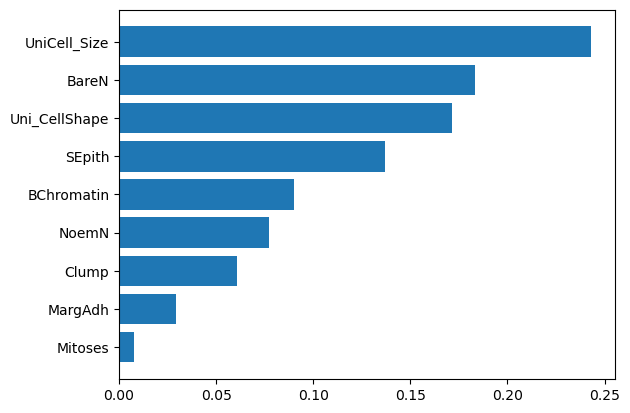

In [11]:
plt.barh(df_imp.variable,df_imp.importance);

### decision tree

In [12]:
dtc = DecisionTreeClassifier(random_state=23)

In [13]:
params = {'max_depth':[None,3,5],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring = 'neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [14]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score : -0.25134111620337896


In [15]:
bm_dtc = gcv.best_estimator_

In [16]:
df_imp = pd.DataFrame({'variable':bm_dtc.feature_names_in_,"importance":bm_dtc.feature_importances_})

In [17]:
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

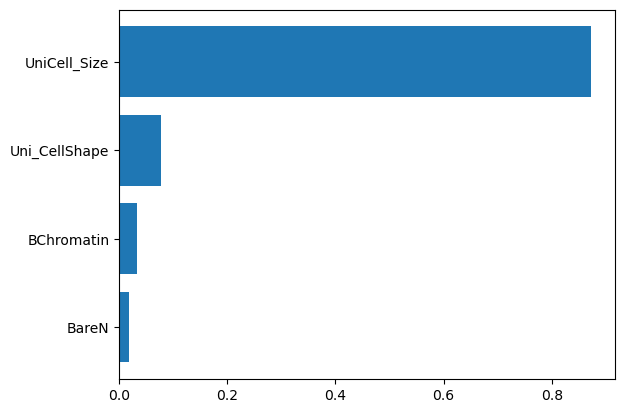

In [18]:
plt.barh(df_imp.variable,df_imp.importance);

## Serialization

In [19]:
from joblib import dump
dump(bm_rf,"RF.joblib")

['RF.joblib']

In [23]:
cancer.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses', 'Class'],
      dtype='object')